In [72]:
import pandas as pd
import re
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt 

In [73]:
df = pd.read_csv('Tweets.csv')

In [74]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [75]:
def cleanComment(cmnt):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", cmnt).split())

In [76]:
def getSentiment(cmnt):
    analysis = TextBlob(cleanComment(cmnt))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [77]:
def getSentiment(airlines):
    global df
    df = df.loc[df['airline'] == airlines]
    tweets=df['text'].values
    
    positive=0
    negative=0
    nuetral=0
    
    for tweet in tweets:
        sentiment=getSentiment(tweet)
        if sentiment=="Positive":
            positive=positive+1
        elif sentiment=="Neutral":
            nuetral=nuetral+1
        elif sentiment=="Negative":
            negative=negative+1
    return positive,negative,nuetral

In [78]:
def getAirlinesSentiment(airlines):
    positive,negative,nuetral=getSentiment(airlines)
    print(positive,negative,nuetral)
    dic={"Positive":positive,"Neutral":nuetral,"Negative":negative}
    Keymax = max(zip(dic.values(), dic.keys()))[1]
    print(Keymax)
    return Keymax

In [79]:
getAirlinesSentiment("Virgin America")

0 0 0
Positive


'Positive'

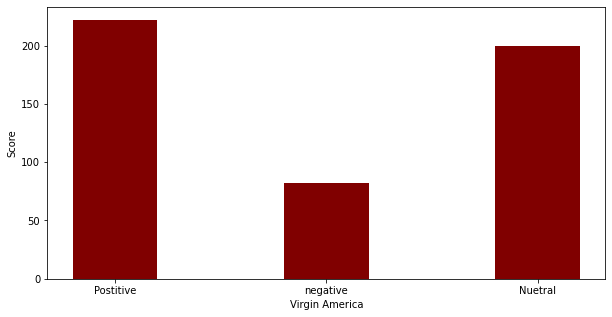

In [80]:
data = {'Postitive':positive, 'negative':negative, 'Nuetral':nuetral}

sentiments= list(data.keys())
scores = list(data.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(sentiments, scores, color ='maroon', width = 0.4)
plt.xlabel(str(airlines))
plt.ylabel("Score")
plt.show()